<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.linear_model import Lasso
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

random.seed(42)
np.random.seed(42)

In [173]:
# Вспомогательные утилиты:
# Заполняем медиану по колонке
def convert_to_float_and_fill_ne(df, column):
    df[column] = df[column].astype(float)
    mediana = df[column].median()
    return df[column].fillna(mediana)
# Удаление 
def remove_postfixs(df, column, postfixs):
    for postfix in postfixs:
        df[column] = df[column].str.replace(postfix, '', regex=False)
    return df[column]

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

**Для того, что бы зафиксировать повторную воспроизводимость и рандом был одинаков. В этом случае мы можем повторной отладкой заниматься и получать предсказуемые результаты.**

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [174]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [175]:
# Отобразите 30 случайных строк тренировочного датасета:
df_train.sample(n=30) # random_state не будем использовать

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [176]:
# Отобразите первые 5
df_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [177]:
# последние 5 объектов тестового датасета
df_train.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [178]:
# Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

По срезу данных можно:
 * Прикинуть содержимое. Приблизительно понять типы, вид данных и их отношение между собой.
 * Увидеть объем колонок, а так же приблизительно их логическую типизацию.
 * Заметить аномалии (к примеру числа в виде строк, флаги в виде строк). Либо не существенные постфиксы для численных значений. 
 * Если датасеты отсортированы (к примеру по времени), то сразу можно увидеть краевые значения данных, а так же понять, где начинаются существенные данные. К примеру, если начальный срез и конечный заметно отличаются, то можно сразу прикинуть характер изменения или мусорные блоки данных.
 * Случайный срез позволяет с какой-то вероятностью окинуть взглядом все данные.  

По срезу нельзя:
 * Однозначно определить классификацию атрибутов.
 * Провести анализ пропусков и дубликатов
 * Масштаб данных и их реальную сложность

In [179]:
# Посмотрите, есть ли в данных явные дубликаты:
print(f'Было дубликатов: {df_train[df_train.duplicated()].shape}')

# Удалим
df_train = df_train.drop_duplicates()
print(f'Осталось дубликатов: {df_train[df_train.duplicated()].shape}')

Было дубликатов: (985, 13)
Осталось дубликатов: (0, 13)


- [*] Достаточно ли метода duplicated для анализа дубликатов? Почему?

Не полностью, так как этот метод проводит точное сравнение. Данные могут содержать небольшие аномалии, такие как лишние пробелы, спец символы, либо логически эквивалентные значения (True, true). Это не позволит гарантировано почистить данные. Вероятно удобнее чистку дубликатов проводить итеративно по мере стандартизации данных.

In [ ]:
report = ProfileReport(df_train, title="Отчет", explorative=True)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 152.39it/s]


Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [ ]:
seats_mediana = df_train['seats'].median()

df_train['seats'] = df_train['seats'].fillna(seats_mediana)
df_test['seats'] = df_test['seats'].fillna(seats_mediana)

df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          190
engine           190
max_power        187
torque           191
seats              0
dtype: int64

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [ ]:
# Исключим целевую переменную:
df_train_without_target = df_train.drop(['selling_price'], axis = 1)
dublicates = df_train_without_target[df_train_without_target.duplicated()]
# Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). 
# Если есть, то сколько?
print(f'В наборе: {dublicates.shape[0]} дубликатов без целевой переменной')
# Отобразите такие объекты:
print(dublicates.head(5))
# Удаляем:
df_train_unique = df_train_without_target.drop_duplicates()
# Оставляем в результате только уникальные индексы:
df_train = df_train.loc[df_train_unique.index]
# Ресетим индексы:
df_train = df_train.reset_index(drop=True)
print(f'Итоговый датасет df_train: {df_train.shape}')

В наборе: 174 дубликатов без целевой переменной
                            name  year  km_driven    fuel seller_type  \
268       Maruti Swift Dzire VXI  2014      70000  Petrol  Individual   
370   BMW X4 M Sport X xDrive20d  2019       7500  Diesel      Dealer   
444          Maruti Alto 800 VXI  2016      50000  Petrol  Individual   
766     Chevrolet Beat Diesel LT  2012      70000  Diesel  Individual   
1000             Maruti Alto LXI  2005      40000  Petrol  Individual   

     transmission         owner     mileage   engine max_power  \
268        Manual  Second Owner   19.1 kmpl  1197 CC  85.8 bhp   
370     Automatic   First Owner  16.78 kmpl  1995 CC   190 bhp   
444        Manual   First Owner  22.74 kmpl   796 CC  47.3 bhp   
766        Manual  Second Owner  25.44 kmpl   936 CC  57.6 bhp   
1000       Manual  Second Owner   19.7 kmpl   796 CC  46.3 bhp   

                   torque  seats  
268        114Nm@ 4000rpm    5.0  
370   400Nm@ 1750-2500rpm    5.0  
444        

In [ ]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [ ]:
# Удаляем лишний столбец
df_train = df_train.drop(['torque'], axis = 1)
df_test = df_test.drop(['torque'], axis = 1)

# Приводим в порядок: удаляем лишние постфиксы:
def remove_postfixs_for_train_test(column, postfix):
    df_train[column] = remove_postfixs(df_train, column, postfix)
    df_test[column] = remove_postfixs(df_test, column, postfix)

# mileage
# kmpl, km/kg, скорее всего это разная размерность в принципе и данных по конвертации - нет,
# но для тестовых целей сичтаем, что это эквивалентные понятия:
remove_postfixs_for_train_test('mileage', [' kmpl', ' km/kg'])
remove_postfixs_for_train_test('engine', [' CC'])
remove_postfixs_for_train_test('max_power', [' bhp'])

# В данных встречаются пустые строки - очевидно эквивалент, что не заполнены:
# У нас остануться пропуски, но только тут. Далее мы от них избавимся при приведении типов:
df_train['max_power'] = df_train['max_power'].replace('', np.nan)
df_test['max_power'] = df_test['max_power'].replace('', np.nan)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [ ]:
# Для экономии букв вынесем в функцию:
def convert_columns_to_types(df):
    df['mileage'] = convert_to_float_and_fill_ne(df, 'mileage')
    df['max_power'] = convert_to_float_and_fill_ne(df, 'max_power')
    df['seats'] = df['seats'].astype(int)

    # Привести engine к int просто так не получится, так как там все еще содержатся пропуски, которые до удаления постфиксов заполнить было нельзя
    # так как для заполнения которых необходимо вычислить медиану, но котоая сама может быть вычислена только на основе типа numeric
    # провернем это через промежуточный тип float:
    df['engine'] = convert_to_float_and_fill_ne(df, 'engine')
    df['engine'] = df['engine'].astype(int)
    return df

df_train = convert_columns_to_types(df_train)
df_test = convert_columns_to_types(df_test)

# Проверяем, что типы корректные:
print(df_train.dtypes)
print(df_test.dtypes)
# Проверяем, что пропусков не осталось:
print(f'Пропуски в Train данных: {df_train.isna().sum().sum()}')
print(f'Пропуски в Test данных: {df_test.isna().sum().sum()}')
# Все! Данные нормальные и без пропусков!

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object
Пропуски в Train данных: 0
Пропуски в Test данных: 0


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [ ]:
print(' ---- Числовые признаки: -----------')
print(df_train.describe())
print(' ---- Категориальные признаки: -----------')
print(df_train.describe(include=[object]))
for name in ['fuel', 'seller_type', 'transmission', 'owner']:
    print('-----------------:')
    print(df_train[name].value_counts())

 ---- Числовые признаки: -----------
              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000

In [ ]:
# assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

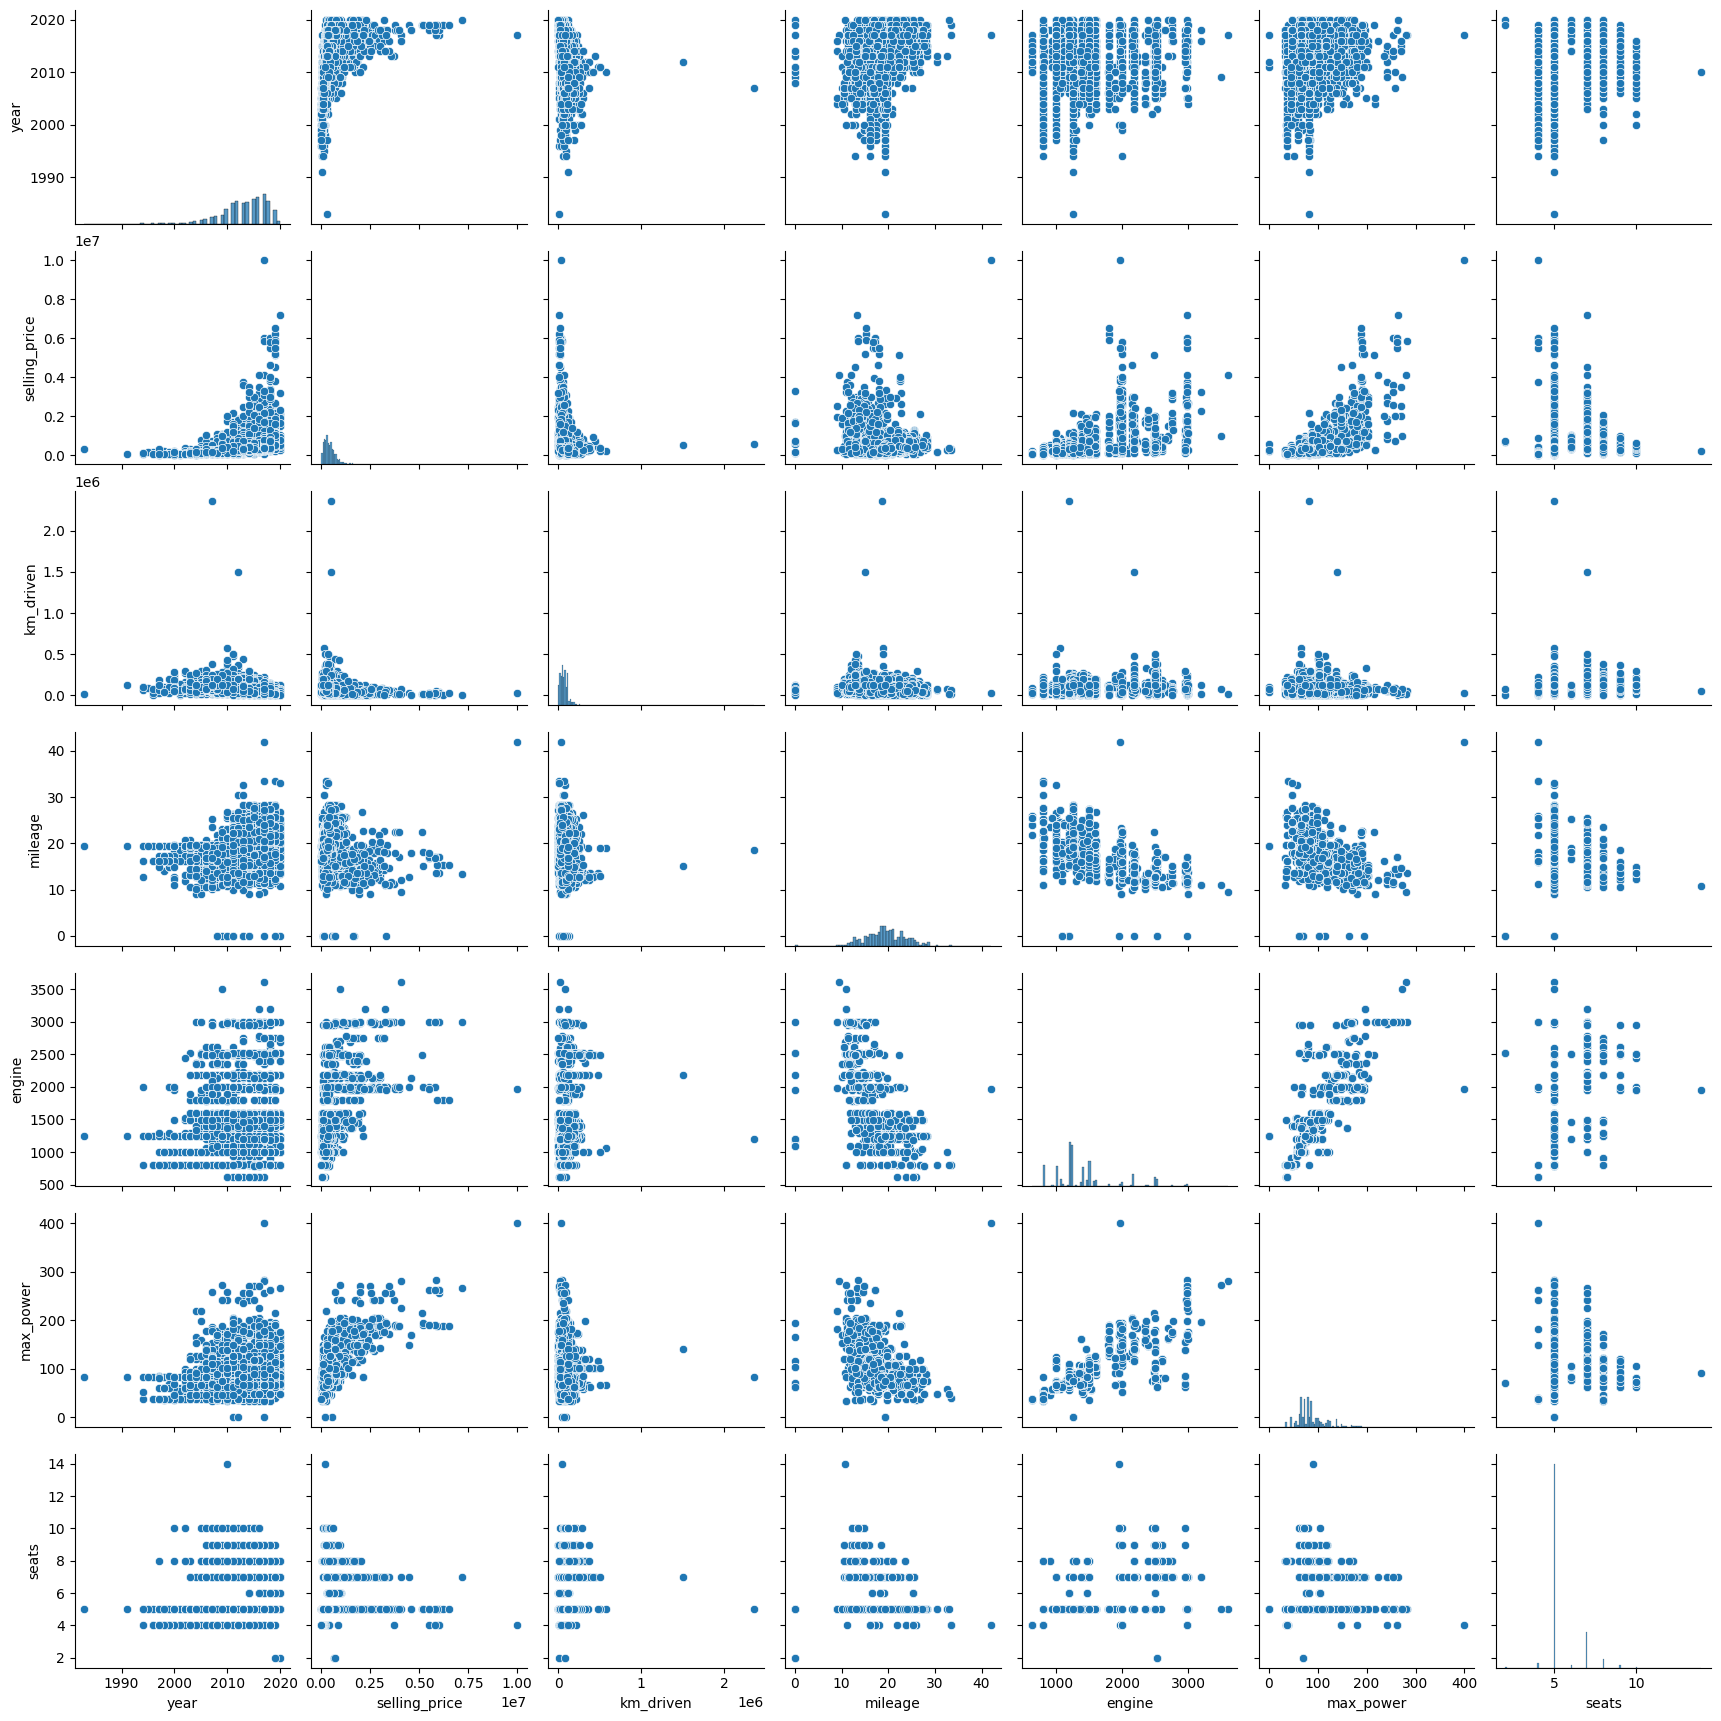

In [ ]:
%matplotlib inline
sns.pairplot(df_train)
plt.show()

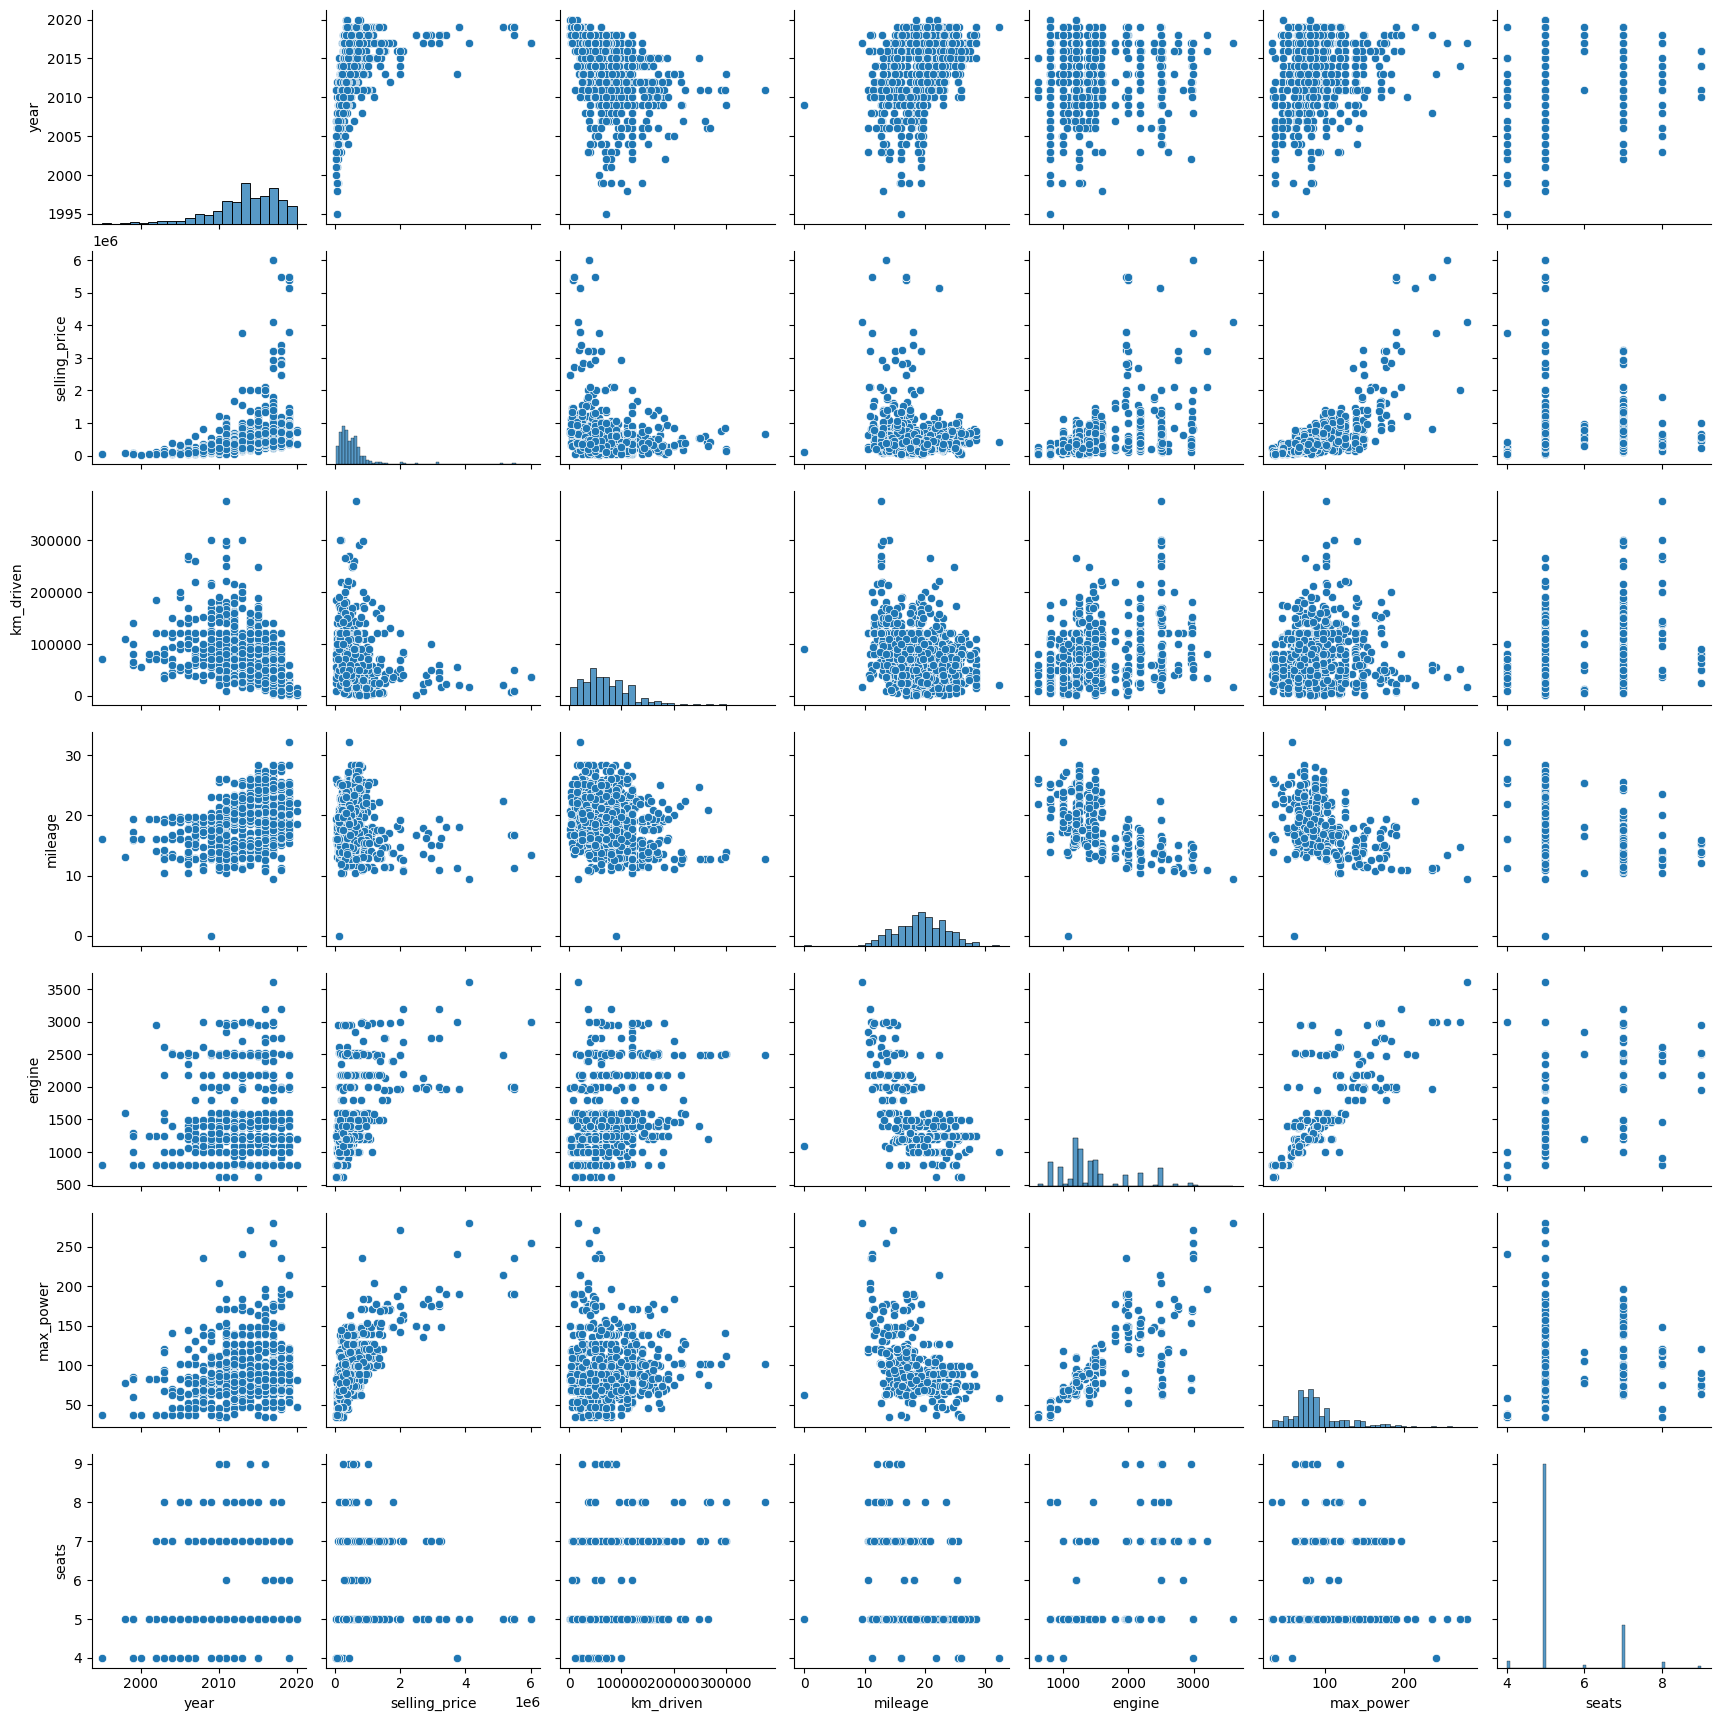

In [ ]:
sns.pairplot(df_test)
plt.show()

## Ответы
#### Похожими ли оказались совокупности при разделении на трейн и тест?:
Данные похожи, хоть визуально диагностируется разница в некоторых отношениях. Скорее всего это вызвано разницей в объеме.

#### Можно ли предположить на основе распределений связь признаков с целевой переменной?

Явной связи не диагностируется, но как миниммум можно прикинуть отношения:
* Цена пропроциональна году
* Обратна пропроциональна пробегу
* Мощность и двигатель ведут себя похоже
* Пробег/километраж так же схожи по воздействию

#### Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Да, Мы можем предположить, что основную долю в цену вносят:
* Год производства
* Пробег/километраж 
* Мощность/Двигатель

и в меньшей степени:
* Количество мест

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [ ]:
df_for_corr = df_train.select_dtypes(include='number')
correlation = df_for_corr.corr()
correlation

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.341334,0.002819,0.156858,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.692814,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.024588,0.192328
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.373390,-0.451059
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.681117,0.652172
max_power,0.156858,0.692814,0.024588,-0.373390,0.681117,1.000000,0.244112
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.244112,1.000000


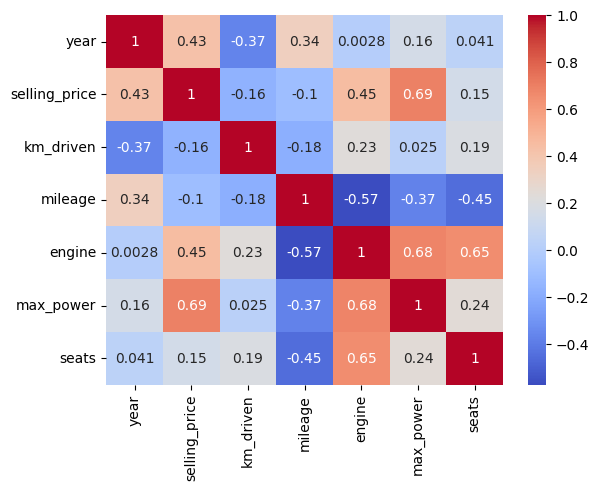

In [ ]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

## Ответы:
* Наименее скоррелированы: year - engine
* Положительная корреляция: selling-price - max_power, max_power - engine, seats - engine
* Да, видно, что год скоррелирован с пробегом

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [ ]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [ ]:
# Функция отбора числовых колонок и выделение целевой переменной:
def extract_X_y_for_numbers_df(df):
    # Отрежем числа:
    numbers_only_df = df.select_dtypes(include='number')
    return numbers_only_df.drop('selling_price', axis=1), numbers_only_df['selling_price']

X_train, y_train = extract_X_y_for_numbers_df(df_train)
X_train.head()

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5


In [ ]:
X_train.describe

<bound method NDFrame.describe of       year  km_driven  mileage  engine  max_power  seats
0     2014     145500    23.40    1248      74.00      5
1     2014     120000    21.14    1498     103.52      5
2     2010     127000    23.00    1396      90.00      5
3     2007     120000    16.10    1298      88.20      5
4     2017      45000    20.14    1197      81.86      5
...    ...        ...      ...     ...        ...    ...
5835  2008     191000    17.92    1086      62.10      5
5836  2013      50000    18.90     998      67.10      5
5837  2013     110000    18.50    1197      82.85      5
5838  2007     119000    16.80    1493     110.00      5
5839  2009     120000    19.30    1248      73.90      5

[5840 rows x 6 columns]>

In [ ]:
# Тестовую так же приведем к числам:
X_test, y_test = extract_X_y_for_numbers_df(df_test)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
# Для упрощения создадим специальный метод для тренировки всех моделей:
def train_model_and_print_stat(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_test = y_test
    print(f'{model_name}:')
    print(f'R2(test) = {r2_score(y_test, y_pred)}')
    print(f'MSE(test) = {MSE(y_test, y_pred)}')
    print(f'R2(train) = {r2_score(y_train, y_pred_train)}')
    print(f'MSE(train) = {MSE(y_train, y_pred_train)}')
    return model, y_test, y_pred

# Тестируем Линейную модель:
linear_model, y_test_linear, y_pred_linear \
    = train_model_and_print_stat(
         LinearRegression(),
         'Линейная модель', X_train, y_train, X_test, y_test
      )

Линейная модель:
R2(test) = 0.5941419681125487
MSE(test) = 233298786264.1253
R2(train) = 0.5922591702157316
MSE(train) = 116874153930.02855


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Посмотрим, что получилось:
linear_scaled_model, y_test_linear_scaled, y_pred_linear_scaled \
   = train_model_and_print_stat(
          LinearRegression(), 'Линейная модель (после скалирования)',
          X_train_scaled, y_train, X_test_scaled, y_test
     )

Линейная модель (после скалирования):
R2(test) = 0.5941419681125579
MSE(test) = 233298786264.12006
R2(train) = 0.5922591702157303
MSE(train) = 116874153930.02892


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
for feature, coef in zip(X_train_scaled.columns, linear_scaled_model.coef_):
    print(f"{feature}: {coef}")    

year: 152772.57084581413
km_driven: -44158.818520052766
mileage: 28833.925777517274
engine: 61178.49433684758
max_power: 322807.35325923417
seats: -23209.132485997423


### Ответ:
признак, который оказался наиболее информативным в предсказании цены : max_power. Это достаточно предсказуемо.

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
# коэффициент alpha пока дефолт
lasso_model, y_test_lasso, y_pred_lasso = train_model_and_print_stat(
    Lasso(), 'Lasso модель', X_train_scaled, y_train, X_test_scaled, y_test
)

Lasso модель:
R2(test) = 0.5941407998542259
MSE(test) = 233299457812.3697
R2(train) = 0.5922591701804456
MSE(train) = 116874153940.1429


In [ ]:
print("Lasso Koef:", lasso_model.coef_)

Lasso Koef: [152772.3902142  -44157.68985794  28832.04339588  61173.66240922
 322808.23691947 -23206.25564908]


#### Ответ:
Нет ничего не занулено

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
# Во всех моделях потребуется подбирать этот гиперпараметр, генерализуем:
ALPHA_RANGE = {
      'alpha': np.logspace(-4, 4, 9) # Оптимальные границы подсмотрел в примерах
    }

def use_GridSearchCV_with_stat(model, X_train, y_train, params = ALPHA_RANGE):
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=10)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)

use_GridSearchCV_with_stat(Lasso(), X_train_scaled, y_train) 

{'alpha': np.float64(10000.0)}
0.5727197315544514


#### Ответы:
Использовалось:  alpha = [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04], значит обучено было: 9 * количество фолдов, то есть 90 моделей

Отпимальные параметры:
'alpha': 10000

Зануление одно - последний коэф. - seats

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
use_GridSearchCV_with_stat(
    ElasticNet(),
    X_train_scaled, y_train,
    params={
        'alpha': np.logspace(-4, 4, 9),
        # попробуем еще один гипер параметр, кроме альфы:
        'l1_ratio': [0.25, 0.5, 0.75, 1] # Оптимальный перебор я подсмотрел в описании
    }
) 

{'alpha': np.float64(0.1), 'l1_ratio': 0.25}
0.5751329853389657


In [ ]:
# Замеры на подобранных коэффициентах:
elastic_model_optimal, y_test_elastic_optimal, y_pred_elastic_optimal = \
    train_model_and_print_stat(ElasticNet(alpha=0.1, l1_ratio=0.25),
   'ElasticNet модель (Optimal)', X_train_scaled, y_train, X_test_scaled, y_test
)

ElasticNet модель (Optimal):
R2(test) = 0.5776584259444717
MSE(test) = 242773997000.40643
R2(train) = 0.5898938688407516
MSE(train) = 117552139985.86845


#### Ответы:
Использовалось:  'alpha': 9 вариантов, и 'l1_ratio': [0.25, 0.5, 0.75, 1] - 4 варианта

Значит обучено было: 9 * 4 * 10 = 360 моделей

Оптимальные параметры:
{'alpha': 0.1, 'l1_ratio': 0.25}

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
# Не удаляем столбец, попробуем его предобработать
# Для этого возьмем исходные данные и выделим целевую переменную:
X_train_cat = df_train.drop('selling_price', axis=1)
X_test_cat = df_test.drop('selling_price', axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [ ]:
# В качестве предобработки выберем наименование компании - их не так много:
def use_first_name(X_train):
    return X_train['name'].str.split(' ').str[0]

X_train_cat['name'] = use_first_name(X_train_cat)
X_test_cat['name'] = use_first_name(X_test_cat)
X_train_cat['name'].head()
# Судя по данным мы могли бы взять и модель машины как второй признак.

0     Maruti
1      Skoda
2    Hyundai
3     Maruti
4    Hyundai
Name: name, dtype: object

In [ ]:
# assert X_train_cat.shape == (5840, 10)

In [ ]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,30,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,1804,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
# Для удобства вынесем в метод, который сразу накручивает даммизы и для seats:
def get_dummies_with_seats(df):
    df = pd.get_dummies(df, drop_first=True)
    seats_dummies = pd.get_dummies(df['seats'], prefix='seats')
    return pd.concat([df.drop('seats', axis=1), seats_dummies], axis=1)

X_train_cat_dummed = get_dummies_with_seats(X_train_cat)
X_test_cat_dummed = get_dummies_with_seats(X_test_cat)
X_train_cat_dummed, X_test_cat_dummed \
    = X_train_cat_dummed.align(X_test_cat_dummed, join='left', axis=1, fill_value=False)

# Убедимся, что колонки консистентны:
assert X_train_cat_dummed.shape[1] == X_test_cat_dummed.shape[1]

print(X_train_cat_dummed.dtypes)
print(X_train_cat_dummed.shape)

year                              int64
km_driven                         int64
mileage                         float64
engine                            int64
max_power                       float64
name_Audi                          bool
name_BMW                           bool
name_Chevrolet                     bool
name_Daewoo                        bool
name_Datsun                        bool
name_Fiat                          bool
name_Force                         bool
name_Ford                          bool
name_Honda                         bool
name_Hyundai                       bool
name_Isuzu                         bool
name_Jaguar                        bool
name_Jeep                          bool
name_Kia                           bool
name_Land                          bool
name_Lexus                         bool
name_MG                            bool
name_Mahindra                      bool
name_Maruti                        bool
name_Mercedes-Benz                 bool


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_cat_dummed)

X_train_cat_dummed = scaler.transform(X_train_cat_dummed)
X_test_cat_dummed = scaler.transform(X_test_cat_dummed)

use_GridSearchCV_with_stat(Ridge(), X_train_cat_dummed, y_train) 

In [ ]:
# Замеры на подобранных коэффициентах:
ridge_model_optimal, y_test_ridge_optimal, y_pred_ridge_optimal = \
    train_model_and_print_stat(
        Ridge(alpha=1000),
        'Ridge модель (Optimal)', X_train_cat_dummed, y_train, X_test_cat_dummed, y_test
    )

#### Сравнение:

| Модель   | R2(test)       | MSE(test)      | R2(train) | MSE(train) |
|:--------:|:--------:|:--------:|:--------:|:--------:|
| Линейная модель   | 0.5941419681125448       | 233298786264.12756      | 0.5922591702157316 | 116874153930.02855 |
| Линейная модель (после скалирования)   | 0.5941419681125575       | 233298786264.12024      | 0.5922591702157303 | 116874153930.02892 |
| Lasso модель  | 0.5941407998542259       | 233299457812.3697      |0.5922591701804456|116874153940.14|
| Lasso модель (Optimal)  | 0.5815817170381995       | 240518777247.6497      |0.5892503567970667|117736595208.78355|
| ElasticNet модель (Optimal)  | 0.5776584259444717       |242773997000.40643 |0.5898938688407516|117552139985.86845|
| Ridge модель (Optimal) | 0.7745367099495765 |129602737369.17659 |0.7651794809984087|67308563378.95265|

#### Вывод:
Лучший результат по R2 и MSE показала Ridge модель (Optimal). Сравнивая метрики моделей по тест и трейн корпусам можно сказать, что модели не сильно переобучаются. 

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [ ]:
def business_metric(y_true, y_pred):
    # your code here

business_metric(# your code here)

IndentationError: expected an indented block after function definition on line 1 (2648959176.py, line 4)

`Your answer here`

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.